In [1]:
import pandas as pd

In [6]:
credit_data = pd.read_csv('../data/Credit_risk.csv');
credit_data.head(13)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [7]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [8]:
credit_data = credit_data.dropna()
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  1997 non-null   int64  
 1   income    1997 non-null   float64
 2   age       1997 non-null   float64
 3   loan      1997 non-null   float64
 4   default   1997 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 93.6 KB


In [9]:
credit_data['income'] = credit_data['income'].astype('int64', copy = False)
credit_data['age'] = credit_data['age'].astype('int64', copy = False)
credit_data['loan'] = credit_data['loan'].astype('int64', copy = False)

In [10]:
credit_data.head(20)

,clientid,income,age,loan,default
0,1,66155,59,8106,0
1,2,34415,48,6564,0
2,3,57317,63,8020,0
3,4,42709,45,6103,0
4,5,66952,18,8770,1
5,6,24904,57,15,0
6,7,48430,26,5722,0
7,8,24500,32,2971,1
8,9,40654,55,4755,0
9,10,25075,39,1409,0


In [11]:
credit_data.loc[credit_data['age']<0, 'age'] = None
credit_data = credit_data.dropna()
credit_data['age'] = credit_data['age'].astype('int64', copy = False)
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   clientid  1994 non-null   int64
 1   income    1994 non-null   int64
 2   age       1994 non-null   int64
 3   loan      1994 non-null   int64
 4   default   1994 non-null   int64
dtypes: int64(5)
memory usage: 93.5 KB


In [12]:
credit_data.head(20)

,clientid,income,age,loan,default
0,1,66155,59,8106,0
1,2,34415,48,6564,0
2,3,57317,63,8020,0
3,4,42709,45,6103,0
4,5,66952,18,8770,1
5,6,24904,57,15,0
6,7,48430,26,5722,0
7,8,24500,32,2971,1
8,9,40654,55,4755,0
9,10,25075,39,1409,0


# Визуализация

In [13]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 7, 5

<AxesSubplot:xlabel='age'>

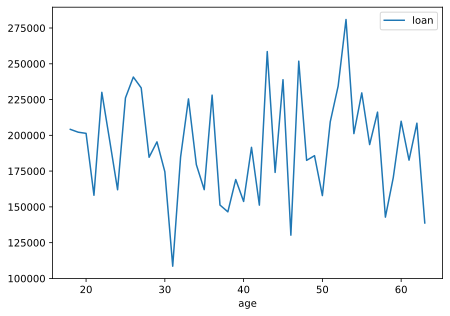

In [14]:
loan_df = credit_data[[x for x in credit_data.columns if 'loan' in x] + ['age']]
loan_df.groupby('age').sum().plot()

<AxesSubplot:xlabel='age'>

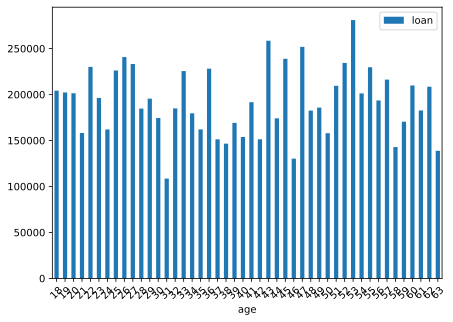

In [15]:
loan_df.groupby('age').sum().plot(kind='bar', rot=45)

In [16]:
cols = ['income', 'age', 'loan', 'default']
sns_plot = sns.pairplot(credit_data[cols])
#sns_plot.savefig('pairplot.png')

C:\Users\kgubk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

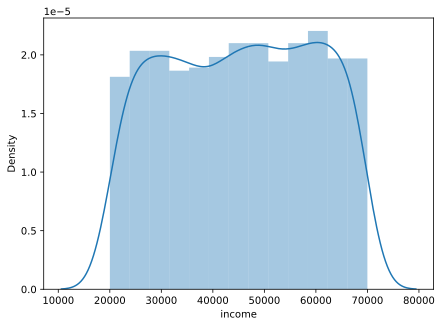

In [17]:
sns.distplot(credit_data.income)

# 2 набор данных на регрессию

In [2]:
student_math = pd.read_csv('../data/student_math.csv')
student_math.head(14)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [3]:
student_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   pstatus     395 non-null    object
 6   medu        395 non-null    int64 
 7   fedu        395 non-null    int64 
 8   mjob        395 non-null    object
 9   fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    bool  
 16  famsup      395 non-null    bool  
 17  paid        395 non-null    bool  
 18  activities  395 non-null    bool  
 19  nursery     395 non-null    bool  
 20  higher    

In [5]:
a = pd.factorize(student_math['school'])
student_math['school'] = a[0]
a = pd.factorize(student_math['sex'])
student_math['sex'] = a[0]
a = pd.factorize(student_math['address'])
student_math['address'] = a[0]
a = pd.factorize(student_math['famsize'])
student_math['famsize'] = a[0]
a = pd.factorize(student_math['pstatus'])
student_math['pstatus'] = a[0]
a = pd.factorize(student_math['mjob'])
student_math['mjob'] = a[0]
a = pd.factorize(student_math['fjob'])
student_math['fjob'] = a[0]
a = pd.factorize(student_math['reason'])
student_math['reason'] = a[0]
a = pd.factorize(student_math['guardian'])
student_math['guardian'] = a[0]
a = pd.factorize(student_math['guardian'])
student_math['guardian'] = a[0]
student_math.schoolsup.replace({False: 0, True: 1}, inplace = True)
student_math.famsup.replace({False: 0, True: 1}, inplace = True)
student_math.paid.replace({False: 0, True: 1}, inplace = True)
student_math.activities.replace({False: 0, True: 1}, inplace = True)
student_math.nursery.replace({False: 0, True: 1}, inplace = True)
student_math.higher.replace({False: 0, True: 1}, inplace = True)
student_math.internet.replace({False: 0, True: 1}, inplace = True)
student_math.romantic.replace({False: 0, True: 1}, inplace = True)
student_math.head(20)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,0,0,18,0,0,0,4,4,0,0,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,0,1,1,1,0,1,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,1,1,1,1,0,1,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,0,1,4,2,1,2,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,0,1,3,3,2,1,...,4,3,2,1,2,5,4,6,10,10
5,0,1,16,0,1,1,4,3,3,1,...,5,4,2,1,2,5,10,15,15,15
6,0,1,16,0,1,1,2,2,2,1,...,4,4,4,1,1,3,0,12,12,11
7,0,0,17,0,0,0,4,4,2,0,...,4,1,4,1,1,1,6,6,5,6
8,0,1,15,0,1,0,3,2,3,1,...,4,2,2,1,1,1,0,16,18,19
9,0,1,15,0,0,1,3,4,2,1,...,5,5,1,1,1,5,0,14,15,15
